# Práctica 1, Sesión 3: Modelos lineales generativos

**Notación:** $\quad\boldsymbol{x}\in\mathbb{R}^D\;$ y $\;y\in\{1,\dotsc,C\}\;$ salvo que se indique otra cosa

**Clasificador generativo:** $\;$ expresa **posteriors** en función de **priors** y **densidades condicionales** de las clases, las cuales puede muestrearse para **generar** datos sintéticos
$$p(y=c\mid\boldsymbol{x},\boldsymbol{\theta})=\frac{p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta})\,p(y=c,\boldsymbol{\theta})}{\sum_{c'}p(\boldsymbol{x}\mid y=c',\boldsymbol{\theta})\,p(y=c',\boldsymbol{\theta})}%
\propto p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta})\,p(y=c,\boldsymbol{\theta})$$

**Linealidad:** $\;$ la log-posterior suele ser lineal con $\boldsymbol{x},\,$ aunque en algunos es cuadrática

**Ajuste:** $\;$ la máximización de la log-verosimilitud conjunta suele conducir a estimadores fáciles de calcular mediante conteo y promediado
* Los priors de las clases se estiman como frecuencias relativas, $\,\hat{\pi}_c=N_c/N$
* Los parámetros de cada clase se estiman con sus datos de entrenamiento (salvo $\mathbf{\Sigma}$ en LDA, que se estima con todos)

## 1. Naive Bayes

**Clasificador naive Bayes Gaussiano (GNB):** $\;\boldsymbol{\theta}_c=(\boldsymbol{\theta}_{c1},\dotsc,\boldsymbol{\theta}_{cD})^t,\,\boldsymbol{\theta}_{cd}=(\mu_{cd},\sigma_{cd}^2),\,$ media y varianza de la característica $d$ en $c$
$$p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta}_c)=\prod_{d=1}^D \mathcal{N}(x_d\mid\mu_{cd},\sigma_{cd}^2)%
\qquad\text{con}\qquad%
\hat{\mu}_{cd}=\frac{1}{N_c}\sum_{n:y_n=c}x_{nd}\quad\text{y}\quad%
\hat{\sigma}_{cd}^2=\frac{1}{N_c}\sum_{n:y_n=c}(x_{nd}-\hat{\mu}_{cd})^2$$

**Aplicación a iris:** $\;$ con suavizado de varianzas añadiendo un porcentaje, `var_smoothing`, de la mayor varianza empírica hallada (1e-9 por omisión)

In [3]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris; from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB; from sklearn.metrics import accuracy_score
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
clf = GaussianNB(var_smoothing=1e-9).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de GaussianNB() es 93.3%


**Ejercicio:** $\;$ estudia el efecto de `var_smoothing` sobre la precisión de GNB

In [4]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris; from sklearn.model_selection import train_test_split # type: ignore
from sklearn.naive_bayes import GaussianNB; from sklearn.metrics import accuracy_score # type: ignore
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1e-3, 1e-6, 1e-12, 1e-16]:
    clf = GaussianNB(var_smoothing=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.4%}')

La precisión de GaussianNB(var_smoothing=10) es 80.0000%
La precisión de GaussianNB(var_smoothing=9) es 80.0000%
La precisión de GaussianNB(var_smoothing=8) es 83.3333%
La precisión de GaussianNB(var_smoothing=7) es 83.3333%
La precisión de GaussianNB(var_smoothing=6) es 86.6667%
La precisión de GaussianNB(var_smoothing=5) es 90.0000%
La precisión de GaussianNB(var_smoothing=4) es 90.0000%
La precisión de GaussianNB(var_smoothing=3) es 90.0000%
La precisión de GaussianNB(var_smoothing=2) es 90.0000%
La precisión de GaussianNB(var_smoothing=1) es 86.6667%
La precisión de GaussianNB(var_smoothing=0.001) es 93.3333%
La precisión de GaussianNB(var_smoothing=1e-06) es 93.3333%
La precisión de GaussianNB(var_smoothing=1e-12) es 93.3333%
La precisión de GaussianNB(var_smoothing=1e-16) es 93.3333%


**Ejercicio:** $\;$ estudia el efecto de `var_smoothing` sobre la precisión de GNB en digits y olivetti

Digits:

In [5]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import load_digits; from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB; from sklearn.metrics import accuracy_score
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1e-3, 1e-6, 1e-12, 1e-16]:
    clf = GaussianNB(var_smoothing=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de GaussianNB(var_smoothing=10) es 86.1%
La precisión de GaussianNB(var_smoothing=9) es 86.1%
La precisión de GaussianNB(var_smoothing=8) es 86.1%
La precisión de GaussianNB(var_smoothing=7) es 86.4%
La precisión de GaussianNB(var_smoothing=6) es 86.7%
La precisión de GaussianNB(var_smoothing=5) es 86.7%
La precisión de GaussianNB(var_smoothing=4) es 86.7%
La precisión de GaussianNB(var_smoothing=3) es 87.2%
La precisión de GaussianNB(var_smoothing=2) es 87.8%
La precisión de GaussianNB(var_smoothing=1) es 89.4%
La precisión de GaussianNB(var_smoothing=0.001) es 89.7%
La precisión de GaussianNB(var_smoothing=1e-06) es 87.8%
La precisión de GaussianNB(var_smoothing=1e-12) es 75.3%
La precisión de GaussianNB(var_smoothing=1e-16) es 67.2%


Olivetti:

In [6]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_olivetti_faces; from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB; from sklearn.metrics import accuracy_score
X, y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1e-3, 1e-6, 1e-12, 1e-16]:
    clf = GaussianNB(var_smoothing=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de GaussianNB(var_smoothing=10) es 73.8%
La precisión de GaussianNB(var_smoothing=9) es 75.0%


La precisión de GaussianNB(var_smoothing=8) es 75.0%
La precisión de GaussianNB(var_smoothing=7) es 75.0%
La precisión de GaussianNB(var_smoothing=6) es 75.0%
La precisión de GaussianNB(var_smoothing=5) es 75.0%
La precisión de GaussianNB(var_smoothing=4) es 78.8%
La precisión de GaussianNB(var_smoothing=3) es 78.8%
La precisión de GaussianNB(var_smoothing=2) es 78.8%
La precisión de GaussianNB(var_smoothing=1) es 83.8%
La precisión de GaussianNB(var_smoothing=0.001) es 87.5%
La precisión de GaussianNB(var_smoothing=1e-06) es 85.0%
La precisión de GaussianNB(var_smoothing=1e-12) es 85.0%
La precisión de GaussianNB(var_smoothing=1e-16) es 85.0%


## 2. Análisis discriminante lineal (LDA)

**LDA:** $\;\boldsymbol{\theta}_c=(\boldsymbol{\mu}_c^t,\,\operatorname{vec}(\mathbf{\Sigma}))^t,\,$ media de la clase $c$ y matriz de varianzas común para todas las clases
$$p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta}_c)=\mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma})
\qquad\text{con}\qquad%
\hat{\boldsymbol{\mu}}_c=\frac{1}{N_c}\sum_{n:y_n=c}\boldsymbol{x}_n\quad\text{y}\quad%
\hat{\mathbf{\Sigma}}=\frac{1}{N}\sum_c\sum_{n:y_n=c}(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)^t$$

**Aplicación a iris:** $\;$ con suavizado de la matriz de varianzas mediante un parámetro `tol` que controla su fuerza (1e-4 por omisión)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris; X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
clf = LinearDiscriminantAnalysis(tol=1e-4).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis() es 96.7%


**Ejercicio:** $\;$ estudia el efecto de `tol` sobre la precisión de LDA en iris, digits y olivetti

Claro, analicemos el código línea por línea:

```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
```
- Se importa la clase `LinearDiscriminantAnalysis` del módulo `discriminant_analysis` de scikit-learn. Esta clase se utiliza para realizar Análisis Discriminante Lineal (LDA).

```python
from sklearn.datasets import load_iris
```
- Se importa la función `load_iris` del módulo `datasets` de scikit-learn. Esta función se utiliza para cargar el conjunto de datos de Iris, un conjunto de datos clásico en el aprendizaje automático.

```python
X, y = load_iris(return_X_y=True)
```
- Se carga el conjunto de datos de Iris utilizando la función `load_iris`, y se asignan los datos de las características a la variable `X` y los datos de las etiquetas a la variable `y`. `return_X_y=True` se utiliza para obtener tanto las características como las etiquetas.

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
```
- Se dividen los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`. Se reserva el 20% de los datos para pruebas (`test_size=0.2`), y se establece una semilla aleatoria para la reproducibilidad (`random_state=23`).

```python
for i in [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
```
- Se inicia un bucle `for` que iterará sobre una lista de valores `[1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]`. Estos valores representan diferentes valores de tolerancia (`tol`) que se probarán en el modelo LDA.

```python
    clf = LinearDiscriminantAnalysis(tol=i).fit(X_train, y_train)
```
- Se crea una instancia del clasificador LDA (`LinearDiscriminantAnalysis`) con la tolerancia `tol` establecida como el valor actual del bucle. Luego, se ajusta el modelo a los datos de entrenamiento (`X_train`, `y_train`) utilizando el método `fit`.

```python
    acc = accuracy_score(y_test, clf.predict(X_test))
```
- Se calcula la precisión del modelo utilizando los datos de prueba (`X_test`, `y_test`). La función `accuracy_score` compara las etiquetas verdaderas (`y_test`) con las etiquetas predichas por el clasificador (`clf.predict(X_test)`) y devuelve la precisión del modelo.

```python
    print(f'La precisión de {clf!s} es {acc:.1%}')
```
- Se imprime la precisión del modelo junto con una representación en cadena del clasificador (`clf`). La precisión se imprime con un formato de porcentaje con un decimal (`{acc:.1%}`).

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris; X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    clf = LinearDiscriminantAnalysis(tol=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis(tol=1) es 26.7%
La precisión de LinearDiscriminantAnalysis(tol=0) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=0.1) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=0.01) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=0.001) es 96.7%
La precisión de LinearDiscriminantAnalysis() es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=1e-05) es 96.7%
La precisión de LinearDiscriminantAnalysis(tol=1e-06) es 96.7%


Digits:

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits; X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    clf = LinearDiscriminantAnalysis(tol=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis(tol=1) es 8.1%
La precisión de LinearDiscriminantAnalysis(tol=0) es 81.4%
La precisión de LinearDiscriminantAnalysis(tol=0.1) es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=0.01) es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=0.001) es 95.0%
La precisión de LinearDiscriminantAnalysis() es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=1e-05) es 95.0%
La precisión de LinearDiscriminantAnalysis(tol=1e-06) es 95.0%


Olivetti:

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_olivetti_faces; X, y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for i in [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    clf = LinearDiscriminantAnalysis(tol=i).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de LinearDiscriminantAnalysis(tol=1) es 0.0%
La precisión de LinearDiscriminantAnalysis(tol=0) es 83.8%
La precisión de LinearDiscriminantAnalysis(tol=0.1) es 98.8%
La precisión de LinearDiscriminantAnalysis(tol=0.01) es 98.8%
La precisión de LinearDiscriminantAnalysis(tol=0.001) es 98.8%
La precisión de LinearDiscriminantAnalysis() es 98.8%
La precisión de LinearDiscriminantAnalysis(tol=1e-05) es 98.8%
La precisión de LinearDiscriminantAnalysis(tol=1e-06) es 83.8%


## 3. Análisis discriminante cuadrático (QDA)

**QDA:** $\;\boldsymbol{\theta}_c=(\boldsymbol{\mu}_c^t,\,\operatorname{vec}(\mathbf{\Sigma}_c))^t,\,$ media y matriz de varianzas de la clase $c$
$$p(\boldsymbol{x}\mid y=c,\boldsymbol{\theta}_c)=\mathcal{N}(\boldsymbol{x}_n\mid \boldsymbol{\mu}_c,\mathbf{\Sigma}_c)
\qquad\text{con}\qquad%
\hat{\boldsymbol{\mu}}_c=\frac{1}{N_c}\sum_{n:y_n=c}\boldsymbol{x}_n\quad\text{y}\quad%
\hat{\mathbf{\Sigma}}_c=\frac{1}{N_c}\sum_{n:y_n=c}(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)(\boldsymbol{x}_n-\hat{\boldsymbol{\mu}}_c)^t$$

**Aplicación a iris:** $\;$ `reg_param` suaviza matrices de varianzas mediante interpolación con $\mathbf{I}$ (0, valor por omisión, no suaviza; 1 identidad)

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris; from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
clf = QuadraticDiscriminantAnalysis(reg_param=0.0).fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de QuadraticDiscriminantAnalysis() es 96.7%


**Ejercicio:** $\;$ estudia el efecto de `reg_param` sobre la precisión de QDA en iris, digits y olivetti

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris; from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for reg_paragm in [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    clf = QuadraticDiscriminantAnalysis(reg_param=reg_paragm).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')


La precisión de QuadraticDiscriminantAnalysis() es 96.7%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.1) es 93.3%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.2) es 93.3%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.4) es 93.3%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.6) es 90.0%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.8) es 90.0%
La precisión de QuadraticDiscriminantAnalysis(reg_param=1.0) es 90.0%


In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_digits; from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for reg_paragm in [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    clf = QuadraticDiscriminantAnalysis(reg_param=reg_paragm).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de QuadraticDiscriminantAnalysis() es 86.4%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.1) es 96.7%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.2) es 98.1%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.4) es 98.9%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.6) es 99.4%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.8) es 99.4%
La precisión de QuadraticDiscriminantAnalysis(reg_param=1.0) es 89.2%


In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import fetch_olivetti_faces; from sklearn.model_selection import train_test_split
X, y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=23)
for reg_paragm in [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    clf = QuadraticDiscriminantAnalysis(reg_param=reg_paragm).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test)); print(f'La precisión de {clf!s} es {acc:.1%}')

La precisión de QuadraticDiscriminantAnalysis() es 6.2%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.1) es 6.2%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.2) es 3.8%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.4) es 1.2%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.6) es 1.2%
La precisión de QuadraticDiscriminantAnalysis(reg_param=0.8) es 3.8%
La precisión de QuadraticDiscriminantAnalysis(reg_param=1.0) es 2.5%


## 4. Generación de datos sintéticos (opcional)

**digits:** $\;$ QDA con `reg_param=0.9` obtiene un $99.7\%$ de precisión

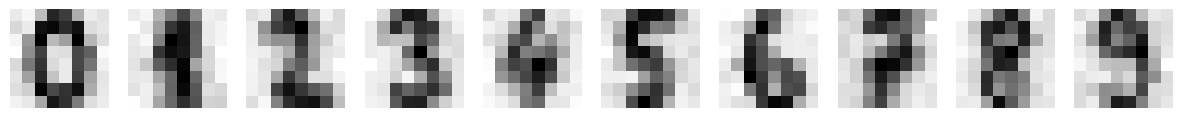

In [15]:
import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal
from sklearn.datasets import load_digits; X, y = load_digits(return_X_y=True)
clf = QuadraticDiscriminantAnalysis(reg_param=0.9, store_covariance=True).fit(X, y)
fig, axs = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    ax = axs[i]; ax.set_axis_off()
    Z = multivariate_normal(mean=clf.means_[i], cov=clf.covariance_[i], seed=23).rvs(1)
    ax.imshow(Z.reshape(8,8), cmap=plt.cm.gray_r, interpolation="none")

**Ejercicio:** $\;$ genera caras sintéticas con olivetti y LDA ($98.8\%$ de acierto)

Este código realiza un análisis de componentes principales (PCA) seguido de un análisis discriminante lineal (LDA) en el conjunto de datos de rostros de Olivetti, y luego genera imágenes sintéticas de rostros utilizando una distribución normal multivariante. Aquí está el desglose línea por línea:

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
```
- Se importan las bibliotecas necesarias: NumPy para cálculos numéricos, Matplotlib para visualización, SciPy para distribuciones estadísticas y scikit-learn para PCA y el conjunto de datos de rostros de Olivetti.

```python
X, y = fetch_olivetti_faces(return_X_y=True)
```
- Se cargan los datos de rostros de Olivetti. `X` contiene las imágenes de los rostros y `y` contiene las etiquetas correspondientes.

```python
N, D = X.shape
```
- Se obtienen las dimensiones del conjunto de datos: `N` es el número de muestras (rostros) y `D` es la dimensión de cada muestra (tamaño de la imagen).

```python
K = 200
pca = PCA(n_components=K).fit(X)
X = pca.transform(X)
```
- Se realiza un PCA con 200 componentes principales (`K=200`) en los datos de entrada `X`. Esto reduce la dimensionalidad del conjunto de datos a 200 dimensiones.

```python
clf = LinearDiscriminantAnalysis().fit(X, y)
```
- Se ajusta un modelo de Análisis Discriminante Lineal (LDA) a los datos transformados por PCA.

```python
cov = X.T @ X / N - clf.priors_ * clf.means_.T @ clf.means_
```
- Se calcula la matriz de covarianza utilizando la proyección PCA y los parámetros estimados del modelo LDA.

```python
cc = [0, 9, 21, 36]
nrows, ncols = len(cc), 10
```
- Se definen las columnas (`cc`) que se utilizarán para generar las imágenes sintéticas y se configuran el número de filas y columnas para la visualización.

```python
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
```
- Se crean subplots para mostrar las imágenes originales y sintéticas.

```python
for i, c in enumerate(cc):
```
- Se inicia un bucle para cada una de las imágenes de rostros seleccionadas.

```python
    ax = axes.flat[10*i]; ax.set_axis_off(); ax.set_title(f"Cara {c} media")
    mean = pca.inverse_transform(clf.means_[i]).reshape((64, 64))
    ax.imshow(mean, cmap=plt.cm.gray, interpolation="none")
```
- Se muestra la imagen media del rostro correspondiente a la clase `c`.

```python
    S = multivariate_normal(mean=clf.means_[i], cov=cov, allow_singular=True, seed=23).rvs(ncols)
    for j in np.arange(1, ncols):
        ax = axes.flat[10*i+j]; ax.set_axis_off(); ax.set_title(f"Sintética {j}")
        synth = pca.inverse_transform(S[j,:]).reshape((64, 64))
        ax.imshow(synth, cmap=plt.cm.gray, interpolation="none")
```
Este método se encarga de generar imágenes sintéticas utilizando la proyección inversa del PCA. Aquí hay una explicación detallada:

1. `pca.inverse_transform(S[j,:])`: Primero, se aplica la proyección inversa del PCA sobre un vector aleatorio `S[j,:]`. Este vector contiene valores aleatorios generados a partir de una distribución normal multivariante alrededor de la media de una clase específica. La proyección inversa del PCA convierte este vector de características de menor dimensionalidad de vuelta al espacio de características original.

2. `.reshape((64, 64))`: Después de obtener el vector de características de vuelta al espacio de la imagen original, se redimensiona para que coincida con el tamaño de la imagen original. En el caso de los rostros de Olivetti, cada imagen tiene un tamaño de 64x64 píxeles. Por lo tanto, esta operación de remodelación convierte el vector de características de vuelta a una matriz de píxeles 64x64, que representa una imagen sintética.

- Se generan imágenes sintéticas utilizando la distribución normal multivariante y se muestran en las subplots correspondientes. Las imágenes se generan a partir de la media del rostro de la clase `c` y la matriz de covarianza estimada.

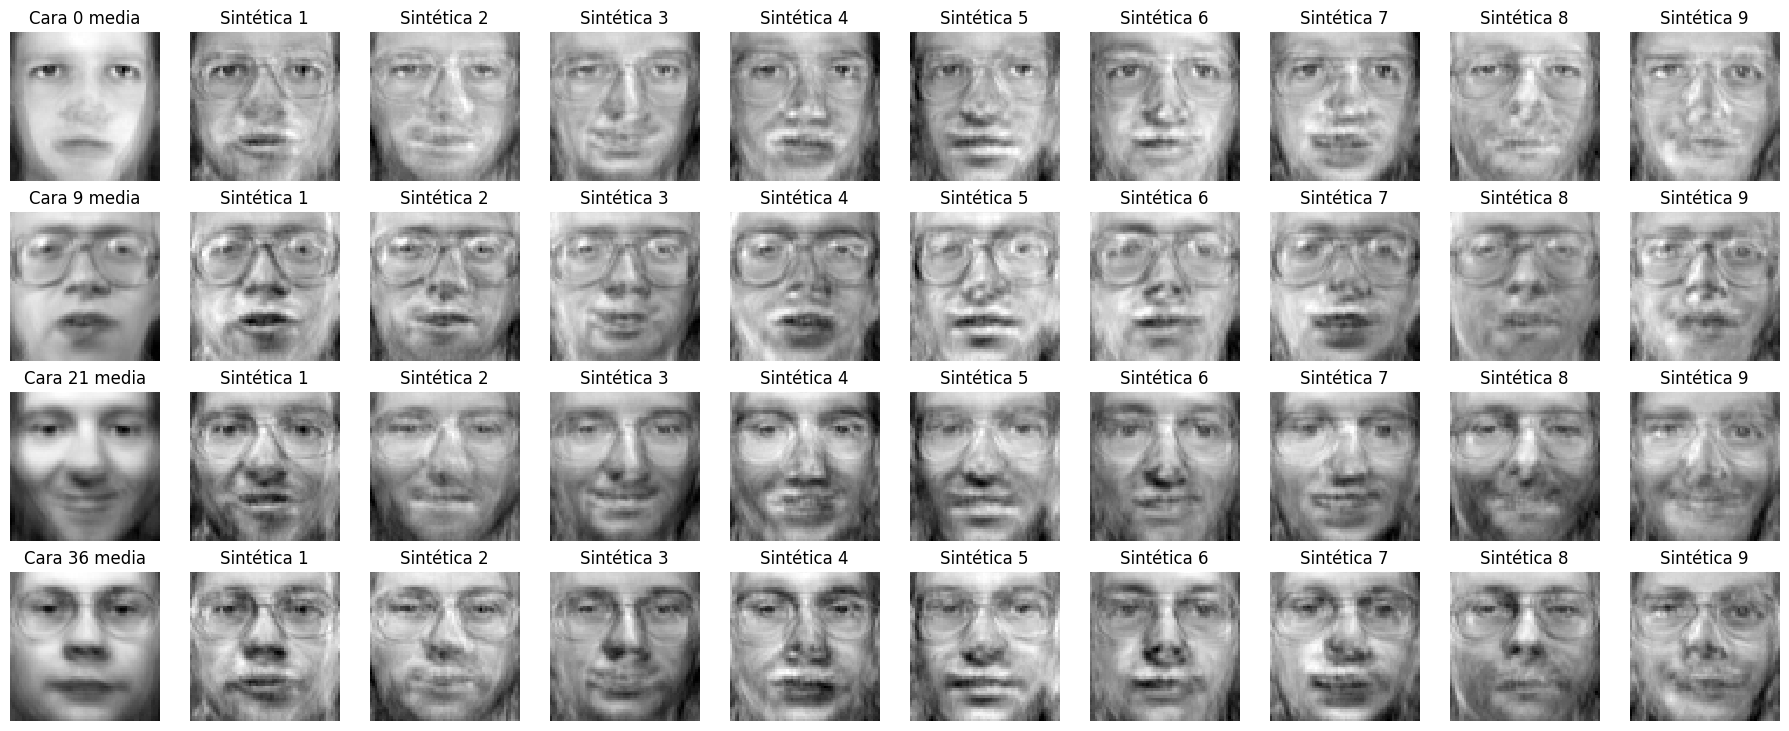

In [16]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA; from sklearn.datasets import fetch_olivetti_faces
X, y = fetch_olivetti_faces(return_X_y=True); N, D = X.shape
K = 200; pca = PCA(n_components=K).fit(X); X = pca.transform(X)
clf = LinearDiscriminantAnalysis().fit(X, y)
cov = X.T @ X / N - clf.priors_ * clf.means_.T @ clf.means_
cc = [0, 9, 21, 36]; nrows, ncols = len(cc), 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i, c in enumerate(cc):
    ax = axes.flat[10*i]; ax.set_axis_off(); ax.set_title(f"Cara {c} media")
    mean = pca.inverse_transform(clf.means_[i]).reshape((64, 64))
    ax.imshow(mean, cmap=plt.cm.gray, interpolation="none")
    S = multivariate_normal(mean=clf.means_[i], cov=cov, allow_singular=True, seed=23).rvs(ncols)
    for j in np.arange(1, ncols):
        ax = axes.flat[10*i+j]; ax.set_axis_off(); ax.set_title(f"Sintética {j}")
        synth = pca.inverse_transform(S[j,:]).reshape((64, 64))
        ax.imshow(synth, cmap=plt.cm.gray, interpolation="none")